#Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the 'curtailment_data_2020' dataset from an Excel file
# Using the 'Curtailments' sheet to load curtailment data
curtailment_data_2020 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/productionandcurtailmentsdata_2020.xlsx", sheet_name="Curtailments")
# Converting all column names to lowercase for consistency and easier referencing
curtailment_data_2020.columns = [feature.lower() for feature in curtailment_data_2020.columns]

# Importing the 'production_data_2020' dataset from the same Excel file
# Using the 'Production' sheet to load production data
production_data_2020 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/productionandcurtailmentsdata_2020.xlsx", sheet_name="Production")
# Converting all column names to lowercase for consistency and easier referencing
production_data_2020.columns = [feature.lower() for feature in production_data_2020.columns]


In [4]:

curtailment_data_2020.head()

,date,hour,interval,wind curtailment,solar curtailment
0,2020-01-01,9,5,NaN,1.960000
1,2020-01-01,9,6,NaN,10.430918
2,2020-01-01,9,10,NaN,1.295686
3,2020-01-01,9,11,40.030000,153.010799
4,2020-01-01,9,12,26.946634,161.819285


In [5]:
production_data_2020.head()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
0,2020-01-01 00:00:00,1,1,22121.306042,0.0,290.128537,21831.177504,1684.108439,2272.914003,1454.382066,8523.626667,13598.950729,8187.546221,-1.271354
1,2020-01-01 00:05:00,1,2,22119.647656,0.0,285.203357,21834.444300,1658.931626,2273.301338,1357.157727,8385.320000,13726.372839,8436.982147,7.954818
2,2020-01-01 00:10:00,1,3,22056.574375,0.0,275.933807,21780.640568,1666.341899,2272.750655,1319.864573,8333.773333,13716.481484,8457.524358,6.319557
3,2020-01-01 00:15:00,1,4,21981.423021,0.0,275.207947,21706.215074,1664.394765,2273.263670,1331.500633,8333.493333,13638.609375,8369.450307,9.320312
4,2020-01-01 00:20:00,1,5,21901.401719,0.0,277.932034,21623.469684,1670.286625,2273.183646,1302.441129,8255.800000,13636.090573,8390.179172,9.511146


In [6]:
production_data_2020.dtypes

,0
date,datetime64[ns]
hour,int64
interval,int64
load,float64
solar,float64
wind,float64
net load,float64
renewables,float64
nuclear,float64
large hydro,float64


In [7]:
curtailment_data_2020.dtypes

,0
date,datetime64[ns]
hour,int64
interval,int64
wind curtailment,float64
solar curtailment,float64


In [8]:

print("Shape of Curtailments Data",curtailment_data_2020.shape)

print("Shape of Production Data",production_data_2020.shape)

Shape of Curtailments Data (43903, 5)
Shape of Production Data (105408, 14)


In [9]:
def merge_curtailment_production(curtailment, production):
    # Convert 'date' column to datetime and extract only the date part for both datasets
    curtailment["date"] = pd.to_datetime(curtailment["date"]).dt.date
    production["date"] = pd.to_datetime(production["date"]).dt.date

    # Convert 'hour' column to integer type to ensure consistency in data types before merging
    curtailment["hour"] = curtailment["hour"].astype(int)
    production["hour"] = production["hour"].astype(int)

    # Convert 'interval' column to integer type to ensure consistency in data types before merging
    curtailment["interval"] = curtailment["interval"].astype(int)
    production["interval"] = production["interval"].astype(int)

    # Merge the production and curtailment datasets on 'date', 'hour', and 'interval' with a left join
    final_data = production.merge(curtailment, on=["date", "hour", "interval"], how="left")

    # Print the shape of curtailment, production, and final merged datasets to verify merge
    print("Curtailment Data Shape : ", curtailment.shape)
    print("Production Data Shape : ", production.shape)
    print("Final Data Shape : ", final_data.shape, "\n")

    # Calculate and print the percentage of NaN values in the 'curtailment' dataset
    curtailment_nan_in_percentage = curtailment.isna().sum() / len(curtailment) * 100
    # Calculate and print the percentage of NaN values in the 'final_data' dataset
    final_nan_in_percentage = final_data.isna().sum() / len(final_data) * 100

    print("Curtailment NaN Percentage", curtailment_nan_in_percentage)
    print()
    print("Final NaN Percentage", final_nan_in_percentage)
    print("****" * 30)

    # Return the merged dataset
    return final_data


In [10]:
final_data_2020 = merge_curtailment_production(curtailment_data_2020,production_data_2020)

Curtailment Data Shape :  (43903, 5)
Production Data Shape :  (105408, 14)
Final Data Shape :  (105408, 16) 

Curtailment NaN Percentage date                  0.000000
hour                  0.000000
interval              0.000000
wind curtailment     62.852197
solar curtailment     3.592010
dtype: float64

Final NaN Percentage date                               0.000000
hour                               0.000000
interval                           0.000000
load                               0.000000
solar                              0.000000
wind                               0.000000
net load                           0.000000
renewables                         0.000000
nuclear                            0.000000
large hydro                        0.000000
imports                            0.000949
generation                         0.000000
thermal                            0.000000
load less (generation+imports)     0.000949
wind curtailment                  84.519202
solar curta

In [11]:
final_data_2020.head()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),wind curtailment,solar curtailment
0,2020-01-01,1,1,22121.306042,0.0,290.128537,21831.177504,1684.108439,2272.914003,1454.382066,8523.626667,13598.950729,8187.546221,-1.271354,NaN,NaN
1,2020-01-01,1,2,22119.647656,0.0,285.203357,21834.444300,1658.931626,2273.301338,1357.157727,8385.320000,13726.372839,8436.982147,7.954818,NaN,NaN
2,2020-01-01,1,3,22056.574375,0.0,275.933807,21780.640568,1666.341899,2272.750655,1319.864573,8333.773333,13716.481484,8457.524358,6.319557,NaN,NaN
3,2020-01-01,1,4,21981.423021,0.0,275.207947,21706.215074,1664.394765,2273.263670,1331.500633,8333.493333,13638.609375,8369.450307,9.320312,NaN,NaN
4,2020-01-01,1,5,21901.401719,0.0,277.932034,21623.469684,1670.286625,2273.183646,1302.441129,8255.800000,13636.090573,8390.179172,9.511146,NaN,NaN


In [12]:

curtailment_data_2021 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/productionandcurtailmentsdata_2021.xlsx",sheet_name="Curtailments")
curtailment_data_2021.columns = [feature.lower() for feature in curtailment_data_2021.columns]


production_data_2021 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/productionandcurtailmentsdata_2021.xlsx",sheet_name="Production")
production_data_2021.columns = [feature.lower() for feature in production_data_2021.columns]


In [13]:

curtailment_data_2022 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/productionandcurtailmentsdata_2022.xlsx",sheet_name="Curtailments")
curtailment_data_2022.columns = [feature.lower() for feature in curtailment_data_2022.columns]


production_data_2022 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/productionandcurtailmentsdata_2022.xlsx",sheet_name="Production")
production_data_2022.columns = [feature.lower() for feature in production_data_2022.columns]


In [14]:

curtailment_data_2023 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/productionandcurtailmentsdata_2023.xlsx",sheet_name="Curtailments")
curtailment_data_2023.columns = [feature.lower() for feature in curtailment_data_2023.columns]


production_data_2023 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/productionandcurtailmentsdata_2023.xlsx",sheet_name="Production")
production_data_2023.columns = [feature.lower() for feature in production_data_2023.columns]

In [15]:

curtailment_data_2024 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/production-and-curtailments-data-2024.xlsx",sheet_name="Curtailments")
curtailment_data_2024.columns = [feature.lower() for feature in curtailment_data_2024.columns]


production_data_2024 = pd.read_excel(r"/content/drive/Shareddrives/DATA606 capstone project/production-and-curtailments-data-2024.xlsx",sheet_name="Production")
production_data_2024.columns = [feature.lower() for feature in production_data_2024.columns]


In [16]:
final_data_2021 = merge_curtailment_production(curtailment_data_2021,production_data_2021)
final_data_2022 = merge_curtailment_production(curtailment_data_2022,production_data_2022)
final_data_2023 = merge_curtailment_production(curtailment_data_2023,production_data_2023)
final_data_2024 = merge_curtailment_production(curtailment_data_2024,production_data_2024)

Curtailment Data Shape :  (43518, 5)
Production Data Shape :  (105120, 14)
Final Data Shape :  (105120, 16) 

Curtailment NaN Percentage date                  0.000000
hour                  0.000000
interval              0.000000
wind curtailment     66.685050
solar curtailment     5.278276
dtype: float64

Final NaN Percentage date                               0.000000
hour                               0.000000
interval                           0.000000
load                               0.000000
solar                              0.000000
wind                               0.000000
net load                           0.000000
renewables                         0.000000
nuclear                            0.000000
large hydro                        0.000000
imports                            0.000000
generation                         0.000000
thermal                            0.000000
load less (generation+imports)     0.000000
wind curtailment                  86.199581
solar curta

In [17]:
final_data_2020.head()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),wind curtailment,solar curtailment
0,2020-01-01,1,1,22121.306042,0.0,290.128537,21831.177504,1684.108439,2272.914003,1454.382066,8523.626667,13598.950729,8187.546221,-1.271354,NaN,NaN
1,2020-01-01,1,2,22119.647656,0.0,285.203357,21834.444300,1658.931626,2273.301338,1357.157727,8385.320000,13726.372839,8436.982147,7.954818,NaN,NaN
2,2020-01-01,1,3,22056.574375,0.0,275.933807,21780.640568,1666.341899,2272.750655,1319.864573,8333.773333,13716.481484,8457.524358,6.319557,NaN,NaN
3,2020-01-01,1,4,21981.423021,0.0,275.207947,21706.215074,1664.394765,2273.263670,1331.500633,8333.493333,13638.609375,8369.450307,9.320312,NaN,NaN
4,2020-01-01,1,5,21901.401719,0.0,277.932034,21623.469684,1670.286625,2273.183646,1302.441129,8255.800000,13636.090573,8390.179172,9.511146,NaN,NaN


In [18]:

for feature in final_data_2022.columns:
    if feature not in final_data_2021.columns:
        print(feature)

reason


##combining the all the 5 years of data into one

In [19]:
# Concatenate data from multiple years (2020, 2021, 2022, 2023, 2024) into a single DataFrame called 'master_data'
# Concatenation is done along axis 0 (i.e., stacking rows)
master_data = pd.concat([final_data_2020, final_data_2021, final_data_2022, final_data_2023, final_data_2024], axis=0)

# Print the shape of the concatenated DataFrame to check the combined data size
master_data.shape


(525801, 17)

In [20]:
master_data.columns

Index(['date', 'hour', 'interval', 'load', 'solar', 'wind', 'net load',
       'renewables', 'nuclear', 'large hydro', 'imports', 'generation',
       'thermal', 'load less (generation+imports)', 'wind curtailment',
       'solar curtailment', 'reason'],
      dtype='object')

In [21]:
master_data.head()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),wind curtailment,solar curtailment,reason
0,2020-01-01,1,1,22121.306042,0.0,290.128537,21831.177504,1684.108439,2272.914003,1454.382066,8523.626667,13598.950729,8187.546221,-1.271354,NaN,NaN,NaN
1,2020-01-01,1,2,22119.647656,0.0,285.203357,21834.444300,1658.931626,2273.301338,1357.157727,8385.320000,13726.372839,8436.982147,7.954818,NaN,NaN,NaN
2,2020-01-01,1,3,22056.574375,0.0,275.933807,21780.640568,1666.341899,2272.750655,1319.864573,8333.773333,13716.481484,8457.524358,6.319557,NaN,NaN,NaN
3,2020-01-01,1,4,21981.423021,0.0,275.207947,21706.215074,1664.394765,2273.263670,1331.500633,8333.493333,13638.609375,8369.450307,9.320312,NaN,NaN,NaN
4,2020-01-01,1,5,21901.401719,0.0,277.932034,21623.469684,1670.286625,2273.183646,1302.441129,8255.800000,13636.090573,8390.179172,9.511146,NaN,NaN,NaN


In [22]:
master_data.isna().sum()/len(master_data)*100

,0
date,0.000000
hour,0.000000
interval,0.000000
load,0.000000
solar,0.000000
wind,0.000000
net load,0.000000
renewables,0.000000
nuclear,0.000000
large hydro,0.000000


##Resampling the data

In [23]:
# Convert the 'date' column to datetime format to standardize date data
master_data['date'] = pd.to_datetime(master_data['date'])

# Create a new 'datetime' column by combining 'date', 'hour', and 'interval' columns
# 'hour' is added in hours and 'interval' is added in minutes to create an accurate datetime value
master_data['datetime'] = master_data['date'] + pd.to_timedelta(master_data['hour'], unit='h') + pd.to_timedelta(master_data['interval'], unit='m')

# Set 'datetime' as the index of the DataFrame for easier time-based operations and analysis
master_data = master_data.set_index('datetime')


In [24]:
master_data.columns

Index(['date', 'hour', 'interval', 'load', 'solar', 'wind', 'net load',
       'renewables', 'nuclear', 'large hydro', 'imports', 'generation',
       'thermal', 'load less (generation+imports)', 'wind curtailment',
       'solar curtailment', 'reason'],
      dtype='object')

In [25]:
master_data.head()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),wind curtailment,solar curtailment,reason
datetime,,,,,,,,,,,,,,,,,
2020-01-01 01:01:00,2020-01-01,1,1,22121.306042,0.0,290.128537,21831.177504,1684.108439,2272.914003,1454.382066,8523.626667,13598.950729,8187.546221,-1.271354,NaN,NaN,NaN
2020-01-01 01:02:00,2020-01-01,1,2,22119.647656,0.0,285.203357,21834.444300,1658.931626,2273.301338,1357.157727,8385.320000,13726.372839,8436.982147,7.954818,NaN,NaN,NaN
2020-01-01 01:03:00,2020-01-01,1,3,22056.574375,0.0,275.933807,21780.640568,1666.341899,2272.750655,1319.864573,8333.773333,13716.481484,8457.524358,6.319557,NaN,NaN,NaN
2020-01-01 01:04:00,2020-01-01,1,4,21981.423021,0.0,275.207947,21706.215074,1664.394765,2273.263670,1331.500633,8333.493333,13638.609375,8369.450307,9.320312,NaN,NaN,NaN
2020-01-01 01:05:00,2020-01-01,1,5,21901.401719,0.0,277.932034,21623.469684,1670.286625,2273.183646,1302.441129,8255.800000,13636.090573,8390.179172,9.511146,NaN,NaN,NaN


In [26]:
master_data_resampled = master_data.resample('H').agg({
    'load': 'sum',
    'solar': 'sum',
    'wind': 'sum',
    'net load': 'sum',
    'renewables': 'sum',
    'nuclear': 'sum',
    'large hydro': 'sum',
    'imports': 'sum',
    'generation': 'sum',
    'thermal': 'sum',
    'load less (generation+imports)': 'sum',
    'wind curtailment': 'sum',
    'solar curtailment': 'sum'
})


In [27]:
master_data_resampled = master_data_resampled.reset_index()

In [28]:
master_data_resampled.head()

,datetime,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),wind curtailment,solar curtailment
0,2020-01-01 01:00:00,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,87.746888,0.0,0.0
1,2020-01-01 02:00:00,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,60.355430,0.0,0.0
2,2020-01-01 03:00:00,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,46.064453,0.0,0.0
3,2020-01-01 04:00:00,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,22.318281,0.0,0.0
4,2020-01-01 05:00:00,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,-28.847096,0.0,0.0


In [29]:
master_data_resampled.columns

Index(['datetime', 'load', 'solar', 'wind', 'net load', 'renewables',
       'nuclear', 'large hydro', 'imports', 'generation', 'thermal',
       'load less (generation+imports)', 'wind curtailment',
       'solar curtailment'],
      dtype='object')

##Weather data

In [30]:
# Load the weather data from a CSV file into a DataFrame
# The file contains hourly data for California from 2020-01-01 to 2024-09-30
weather_data = pd.read_csv(r"/content/drive/Shareddrives/DATA606 capstone project/California_hourly _data 2020-01-01_to_2024-09-30.csv")

# Display the first few rows of the 'weather_data' DataFrame to get an overview of the data
weather_data.head()


,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,California,2020-01-01T00:00:00,7.8,7.1,5.7,86.33,0.0,0,NaN,0,0.0,10.4,5.6,9.0,1022.0,8.7,10.1,0.0,0.0,0,NaN,Clear,clear-night,"KSMF,72483023232,KSAC"
1,California,2020-01-01T01:00:00,6.3,6.3,5.1,92.32,0.0,0,NaN,0,0.0,10.4,0.5,8.0,1021.1,8.7,6.4,0.0,0.0,0,NaN,Clear,clear-night,"KSMF,72483023232,KSAC"
2,California,2020-01-01T02:00:00,6.2,6.2,5.1,92.32,0.0,0,NaN,0,0.0,10.1,0.5,12.0,1021.4,8.7,5.3,0.0,0.0,0,NaN,Clear,clear-night,"KSMF,72483023232,KSAC"
3,California,2020-01-01T03:00:00,5.8,4.7,5.1,95.57,0.0,0,NaN,0,0.0,11.5,5.8,119.0,1021.1,8.7,5.1,0.0,0.0,0,NaN,Clear,clear-night,"KSMF,72483023232,KSAC"
4,California,2020-01-01T04:00:00,6.1,5.5,5.0,92.25,0.0,0,NaN,0,0.0,11.9,4.9,126.0,1020.8,5.0,10.5,0.0,0.0,0,NaN,Clear,clear-night,"KSMF,72483023232,KSAC"


In [31]:
print(weather_data.shape)

print(weather_data.info())

print(weather_data.isnull().sum())


(41639, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41639 entries, 0 to 41638
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              41639 non-null  object 
 1   datetime          41639 non-null  object 
 2   temp              41639 non-null  float64
 3   feelslike         41639 non-null  float64
 4   dew               41639 non-null  float64
 5   humidity          41639 non-null  float64
 6   precip            41639 non-null  float64
 7   precipprob        41639 non-null  int64  
 8   preciptype        2884 non-null   object 
 9   snow              41639 non-null  int64  
 10  snowdepth         41639 non-null  float64
 11  windgust          41638 non-null  float64
 12  windspeed         41639 non-null  float64
 13  winddir           41639 non-null  float64
 14  sealevelpressure  41639 non-null  float64
 15  cloudcover        41639 non-null  float64
 16  visibility        41639 non-

In [32]:
weather_data.columns = weather_data.columns.str.strip()

print(weather_data.columns.tolist())


['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']


In [33]:
# Load the weather data from a CSV file into a DataFrame
# The file contains hourly data for California from 2020-01-01 to 2024-09-30
# Set 'low_memory=False' to avoid potential dtype warnings when loading large CSV files
weather_data = pd.read_csv(r"/content/drive/Shareddrives/DATA606 capstone project/California_hourly _data 2020-01-01_to_2024-09-30.csv",
                            low_memory=False)


In [34]:
# Load a small sample of the weather data by reading only the first 10 rows
# This is useful for quickly inspecting the data structure without loading the entire dataset
small_sample = pd.read_csv(r"/content/drive/Shareddrives/DATA606 capstone project/California_hourly _data 2020-01-01_to_2024-09-30.csv",
                            nrows=10)

# Print the column names of the sample to understand the available fields in the dataset
print(small_sample.columns)


Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')


In [35]:
# Fill missing values for known columns that do exist
weather_data['precip'].fillna(0, inplace=True)           # Fill with 0 for precipitation
weather_data['precipprob'].fillna(0, inplace=True)       # Fill with 0 for precipitation probability
weather_data['snow'].fillna(0, inplace=True)             # Fill with 0 for snow
weather_data['snowdepth'].fillna(0, inplace=True)        # Fill with 0 for snow depth
weather_data['windgust'].fillna(weather_data['windgust'].mean(), inplace=True)  # Fill with mean
weather_data['windspeed'].fillna(weather_data['windspeed'].mean(), inplace=True)  # Fill with mean
weather_data['solarradiation'].fillna(weather_data['solarradiation'].mean(), inplace=True)  # Fill with mean


In [36]:
# Convert the 'datetime' column in the 'weather_data' DataFrame to datetime format
# This ensures that the 'datetime' column can be used for time-based operations and analysis
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


In [37]:
# Extract the hour from the 'datetime' column and create a new column 'hour'
weather_data['hour'] = weather_data['datetime'].dt.hour

# Extract the day from the 'datetime' column and create a new column 'day'
weather_data['day'] = weather_data['datetime'].dt.day

# Extract the month from the 'datetime' column and create a new column 'month'
weather_data['month'] = weather_data['datetime'].dt.month

# Extract the year from the 'datetime' column and create a new column 'year'
weather_data['year'] = weather_data['datetime'].dt.year


In [38]:
weather_data.drop_duplicates(inplace=True)


In [39]:
print(weather_data.head())
print(weather_data.info())
print(weather_data.isnull().sum())  # Check for any remaining missing values


         name            datetime  temp  feelslike  dew  humidity  precip  \
0  California 2020-01-01 00:00:00   7.8        7.1  5.7     86.33     0.0   
1  California 2020-01-01 01:00:00   6.3        6.3  5.1     92.32     0.0   
2  California 2020-01-01 02:00:00   6.2        6.2  5.1     92.32     0.0   
3  California 2020-01-01 03:00:00   5.8        4.7  5.1     95.57     0.0   
4  California 2020-01-01 04:00:00   6.1        5.5  5.0     92.25     0.0   

   precipprob preciptype  snow  snowdepth  windgust  windspeed  winddir  \
0           0        NaN     0        0.0      10.4        5.6      9.0   
1           0        NaN     0        0.0      10.4        0.5      8.0   
2           0        NaN     0        0.0      10.1        0.5     12.0   
3           0        NaN     0        0.0      11.5        5.8    119.0   
4           0        NaN     0        0.0      11.9        4.9    126.0   

   sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  \
0         

In [40]:
weather_data['severerisk'].fillna(0, inplace=True)  # or use the mean if it makes more sense
print(weather_data.isnull().sum())  # Check for any remaining missing values


name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
preciptype          38755
snow                    0
snowdepth               0
windgust                0
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation          0
solarenergy             0
uvindex                 0
severerisk              0
conditions              0
icon                    0
stations                0
hour                    0
day                     0
month                   0
year                    0
dtype: int64


##Merging of curtailment and production data with the weather data

In [41]:
import pandas as pd

# Check the columns of both DataFrames
print("Weather Data Columns:", weather_data.columns)
print("Master Data Resampled Columns:", master_data_resampled.columns)  # Check the correct DataFrame

# Trim whitespace from column names if needed
weather_data.columns = weather_data.columns.str.strip()
master_data_resampled.columns = master_data_resampled.columns.str.strip()  # Ensure the correct DataFrame

# Display the first few rows to confirm datetime column exists
print("Weather Data Head:\n", weather_data.head())
print("Master Data Resampled Head:\n", master_data_resampled.head())

# Convert datetime columns to a uniform format
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
master_data_resampled['datetime'] = pd.to_datetime(master_data_resampled['datetime'])  # Ensure the correct DataFrame

# Check for NaT values
print("Weather Data NaT Count:", weather_data['datetime'].isna().sum())
print("Master Data Resampled NaT Count:", master_data_resampled['datetime'].isna().sum())

# Perform the merge
merged_data = pd.merge(master_data_resampled, weather_data, on='datetime', how='inner')

# If the result is empty, check for mismatches
if merged_data.empty:
    merged_data = pd.merge(master_data_resampled, weather_data, on='datetime', how='outer', indicator=True)
    print("Mismatched Rows:")
    print(merged_data[merged_data['_merge'] != 'both'])

# Display the merged DataFrame
print(merged_data.head())


Weather Data Columns: Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'hour', 'day', 'month', 'year'],
      dtype='object')
Master Data Resampled Columns: Index(['datetime', 'load', 'solar', 'wind', 'net load', 'renewables',
       'nuclear', 'large hydro', 'imports', 'generation', 'thermal',
       'load less (generation+imports)', 'wind curtailment',
       'solar curtailment'],
      dtype='object')
Weather Data Head:
          name            datetime  temp  feelslike  dew  humidity  precip  \
0  California 2020-01-01 00:00:00   7.8        7.1  5.7     86.33     0.0   
1  California 2020-01-01 01:00:00   6.3        6.3  5.1     92.32     0.0   
2  California 2020-01-01 02:00:00   6.2        6.2  5.1     

### Merged DataFrame Features

The merged DataFrame contains the following features:

1. **datetime**:
   - The combined datetime index for hourly load and weather data, representing the date and time for each observation.

2. **load**:
   - The total electrical load measured in the system, indicating the demand for electricity during the specified time period.

3. **solar**:
   - The amount of solar energy generated, measured in megawatts (MW) or a similar unit, reflecting the contribution of solar power to the overall energy mix.

4. **wind**:
   - The amount of wind energy generated, indicating how much energy was produced from wind sources, also measured in MW or a similar unit.

5. **net load**:
   - The load remaining after accounting for renewable energy generation, calculated as `load - (solar + wind)`. This figure shows the actual demand that must be met by other generation sources.

6. **renewables**:
   - The total contribution from renewable energy sources, which includes energy from solar, wind, and potentially other renewable sources like geothermal and biomass.

7. **nuclear**:
   - The contribution from nuclear power generation, measured in MW, indicating the amount of electricity supplied by nuclear plants during the observed period.

8. **large hydro**:
   - The amount of electricity generated from large hydroelectric sources, reflecting the contribution of large-scale hydropower plants to the energy supply.

9. **imports**:
   - The amount of electricity imported from neighboring regions or countries, providing insight into how much power is being brought in to meet demand.

10. **generation**:
    - The total electricity generation from all sources, including fossil fuels, renewables, and nuclear, indicating the overall production capacity during the observed time.

11. **thermal**:
    - The electricity generation from thermal sources (e.g., coal, gas), showing the contribution from traditional fossil fuel plants to the overall energy generation.

12. **load less (generation + imports)**:
    - The difference between total load and the sum of generation and imports, calculated as `load - (generation + imports)`. This value can indicate whether there is a deficit or surplus of electricity.

13. **wind curtailment**:
    - The amount of wind energy that was curtailed, measured in MW or as a total quantity, indicating instances when wind generation was limited due to grid constraints or low demand.

14. **solar curtailment**:
    - The amount of solar energy that was curtailed, providing insight into how much potential solar generation was not utilized.

15. **temp**:
    - The temperature recorded in the weather data, measured in degrees Celsius or Fahrenheit, affecting both energy demand and generation.

16. **dew**:
    - The dew point temperature recorded, indicating the temperature at which air becomes saturated with moisture. This can influence humidity levels and energy consumption patterns.

17. **humidity**:
    - The humidity level recorded, typically expressed as a percentage, which can affect energy demand, especially for heating and cooling.
    
18. **windspeed**:
    - The wind speed recorded, typically measured in meters per second (m/s) or miles per hour (mph), which can influence both renewable energy generation and energy demand.

19. **visibility**:
    - The visibility level recorded, which can impact various operational aspects of energy generation and distribution, particularly in adverse weather conditions.


In [42]:
merged_data.describe()

,datetime,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),wind curtailment,solar curtailment,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,hour,day,month,year
count,41638,4.163800e+04,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,4.163800e+04,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.0,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000
mean,2022-05-17 12:10:00.201738752,3.196346e+05,59973.559893,28226.701763,231432.337257,108099.411779,24878.388683,23091.371123,55239.770930,2.643942e+05,108325.043905,0.390474,189.788751,3067.669719,16.720318,16.335360,7.745550,61.459162,0.040928,3.926702,0.0,0.000024,19.751058,9.826702,191.133657,1015.288482,18.975467,14.872355,196.488112,0.706833,1.935107,5.645156,11.500408,15.729502,6.284548,2021.893943
min,2020-01-01 01:00:00,0.000000e+00,0.000000,0.000000,-32239.709359,0.000000,0.000000,0.000000,-161279.280000,0.000000e+00,-4437.517886,-408.276354,0.000000,0.000000,-2.600000,-4.800000,-15.300000,6.380000,0.000000,0.000000,0.0,0.000000,0.700000,0.000000,0.000000,992.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2020.000000
25%,2021-03-09 18:15:00,2.654057e+05,0.000000,12748.604192,184626.548449,46352.180251,24217.076229,11616.490810,30478.193333,1.994150e+05,66641.300572,-51.213555,0.000000,0.000000,10.700000,10.700000,4.500000,43.170000,0.000000,0.000000,0.0,0.000000,11.500000,5.400000,142.000000,1011.200000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,3.000000,2021.000000
50%,2022-05-17 12:30:00,2.971549e+05,4555.768973,25507.016697,235720.567934,71140.785488,27123.249767,19829.018857,60108.173334,2.384509e+05,100601.859324,0.073734,0.000000,0.000000,15.700000,15.700000,8.300000,64.480000,0.000000,0.000000,0.0,0.000000,18.000000,9.400000,196.000000,1014.500000,2.500000,16.000000,10.500000,0.000000,0.000000,10.000000,12.000000,16.000000,6.000000,2022.000000
75%,2023-07-25 05:45:00,3.404359e+05,114275.882383,41015.577320,277476.013902,155859.533241,27234.631227,32445.158991,86746.310000,2.959991e+05,138461.885464,53.018730,15.084459,1330.306359,21.900000,21.900000,11.600000,80.770000,0.000000,0.000000,0.0,0.000000,25.900000,13.700000,270.000000,1019.200000,8.700000,16.000000,333.000000,1.200000,3.000000,10.000000,17.750000,23.000000,9.000000,2023.000000
max,2024-09-30 23:00:00,1.105189e+06,450802.762712,135963.978840,917436.253725,586590.583360,54863.981497,102266.298091,170510.760000,1.033409e+06,582902.669478,1182.480443,21885.986119,103619.639661,45.700000,45.700000,21.500000,100.000000,13.450000,100.000000,0.0,0.200000,107.300000,66.600000,360.000000,1035.100000,100.000000,16.000000,1199.000000,4.300000,10.000000,30.000000,23.000000,31.000000,12.000000,2024.000000
std,NaN,8.467194e+04,80235.313606,18712.124975,80366.240876,86441.040578,8061.756047,14769.802567,40942.194941,1.010502e+05,57160.288388,82.730989,777.258400,8956.914552,8.276591,8.284126,4.749868,22.933162,0.345911,19.423188,0.0,0.001834,10.515856,7.378027,105.696129,5.556331,34.693471,3.230416,302.531351,1.089702,2.988368,4.922236,6.922189,8.800149,3.372392,1.372935


In [43]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41638 entries, 0 to 41637
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   datetime                        41638 non-null  datetime64[ns]
 1   load                            41638 non-null  float64       
 2   solar                           41638 non-null  float64       
 3   wind                            41638 non-null  float64       
 4   net load                        41638 non-null  float64       
 5   renewables                      41638 non-null  float64       
 6   nuclear                         41638 non-null  float64       
 7   large hydro                     41638 non-null  float64       
 8   imports                         41638 non-null  float64       
 9   generation                      41638 non-null  float64       
 10  thermal                         41638 non-null  float64       
 11  lo

In [44]:
merged_data.to_csv('/content/merged_data.csv')

#Final data and Basic EDA

In [ ]:
merged_data=pd.read_csv(r"/content/drive/Shareddrives/DATA606 capstone project/merged_data.csv").drop(columns=["Unnamed: 0"])

In [ ]:
import pandas as pd

merged_data.head()

,datetime,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),wind curtailment,solar curtailment,name,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,hour,day,month,year
0,2020-01-01 01:00:00,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,87.746888,0.0,0.0,California,6.3,6.3,5.1,92.32,0.0,0,NaN,0,0.0,10.4,0.5,8.0,1021.1,8.7,6.4,0.0,0.0,0,0.0,Clear,clear-night,"KSMF,72483023232,KSAC",1,1,1,2020
1,2020-01-01 02:00:00,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,60.355430,0.0,0.0,California,6.2,6.2,5.1,92.32,0.0,0,NaN,0,0.0,10.1,0.5,12.0,1021.4,8.7,5.3,0.0,0.0,0,0.0,Clear,clear-night,"KSMF,72483023232,KSAC",2,1,1,2020
2,2020-01-01 03:00:00,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,46.064453,0.0,0.0,California,5.8,4.7,5.1,95.57,0.0,0,NaN,0,0.0,11.5,5.8,119.0,1021.1,8.7,5.1,0.0,0.0,0,0.0,Clear,clear-night,"KSMF,72483023232,KSAC",3,1,1,2020
3,2020-01-01 04:00:00,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,22.318281,0.0,0.0,California,6.1,5.5,5.0,92.25,0.0,0,NaN,0,0.0,11.9,4.9,126.0,1020.8,5.0,10.5,0.0,0.0,0,0.0,Clear,clear-night,"KSMF,72483023232,KSAC",4,1,1,2020
4,2020-01-01 05:00:00,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,-28.847096,0.0,0.0,California,5.2,5.2,4.0,92.37,0.0,0,NaN,0,0.0,11.9,0.5,341.0,1020.1,5.0,10.5,0.0,0.0,0,0.0,Clear,clear-night,"KSMF,72483023232,KSAC",5,1,1,2020


In [ ]:
# Step 1: Remove unnecessary columns
data_cleaned = merged_data.drop(columns=['stations', 'snow'])

# Step 2: Handle missing values
# Checking for missing values
missing_values = data_cleaned.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


,0
preciptype,38754


In [ ]:
# Drop the 'preciptype' column due to extensive missing values
data_cleaned = data_cleaned.drop(columns=['preciptype','year','name','snowdepth','winddir','feelslike','icon'])

# Step 3: Convert 'datetime' column to datetime type
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'])

# Step 5: Check for duplicates and remove them
data_cleaned = data_cleaned.drop_duplicates()

# Step 6: Summary after cleaning
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41638 entries, 0 to 41637
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   datetime                        41638 non-null  datetime64[ns]
 1   load                            41638 non-null  float64       
 2   solar                           41638 non-null  float64       
 3   wind                            41638 non-null  float64       
 4   net load                        41638 non-null  float64       
 5   renewables                      41638 non-null  float64       
 6   nuclear                         41638 non-null  float64       
 7   large hydro                     41638 non-null  float64       
 8   imports                         41638 non-null  float64       
 9   generation                      41638 non-null  float64       
 10  thermal                         41638 non-null  float64       
 11  lo

In [ ]:
# Step 1: Drop unnecessary columns from the dataset
columns_to_drop = ['net load', 'load less (generation+imports)', 'precip', 'precipprob', 'windgust',
                   'sealevelpressure', 'conditions', 'uvindex', 'severerisk', 'visibility', 'solarradiation']
data_final = data_cleaned.drop(columns=columns_to_drop)

# Step 2: Feature Engineering - Create new features
# Combine 'solar curtailment' and 'wind curtailment' to create 'total_curtailment'
data_final['total_curtailment'] = data_final['solar curtailment'] + data_final['wind curtailment']

# Create 'combined_renewables' by summing 'solar', 'renewables', and 'wind' features
data_final['combined_renewables'] = data_final['solar'] + data_final['renewables'] + data_final['wind']

# Drop individual curtailment columns as they are now represented by 'total_curtailment'
data_final = data_final.drop(columns=['solar curtailment', 'wind curtailment'])

# Step 3: Drop the 'dew' feature
data_final = data_final.drop(columns=['dew'])

# Summary of the modified dataset
print(data_final.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41638 entries, 0 to 41637
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             41638 non-null  datetime64[ns]
 1   load                 41638 non-null  float64       
 2   solar                41638 non-null  float64       
 3   wind                 41638 non-null  float64       
 4   renewables           41638 non-null  float64       
 5   nuclear              41638 non-null  float64       
 6   large hydro          41638 non-null  float64       
 7   imports              41638 non-null  float64       
 8   generation           41638 non-null  float64       
 9   thermal              41638 non-null  float64       
 10  temp                 41638 non-null  float64       
 11  humidity             41638 non-null  float64       
 12  windspeed            41638 non-null  float64       
 13  cloudcover           41638 non-

####Correlation analysis

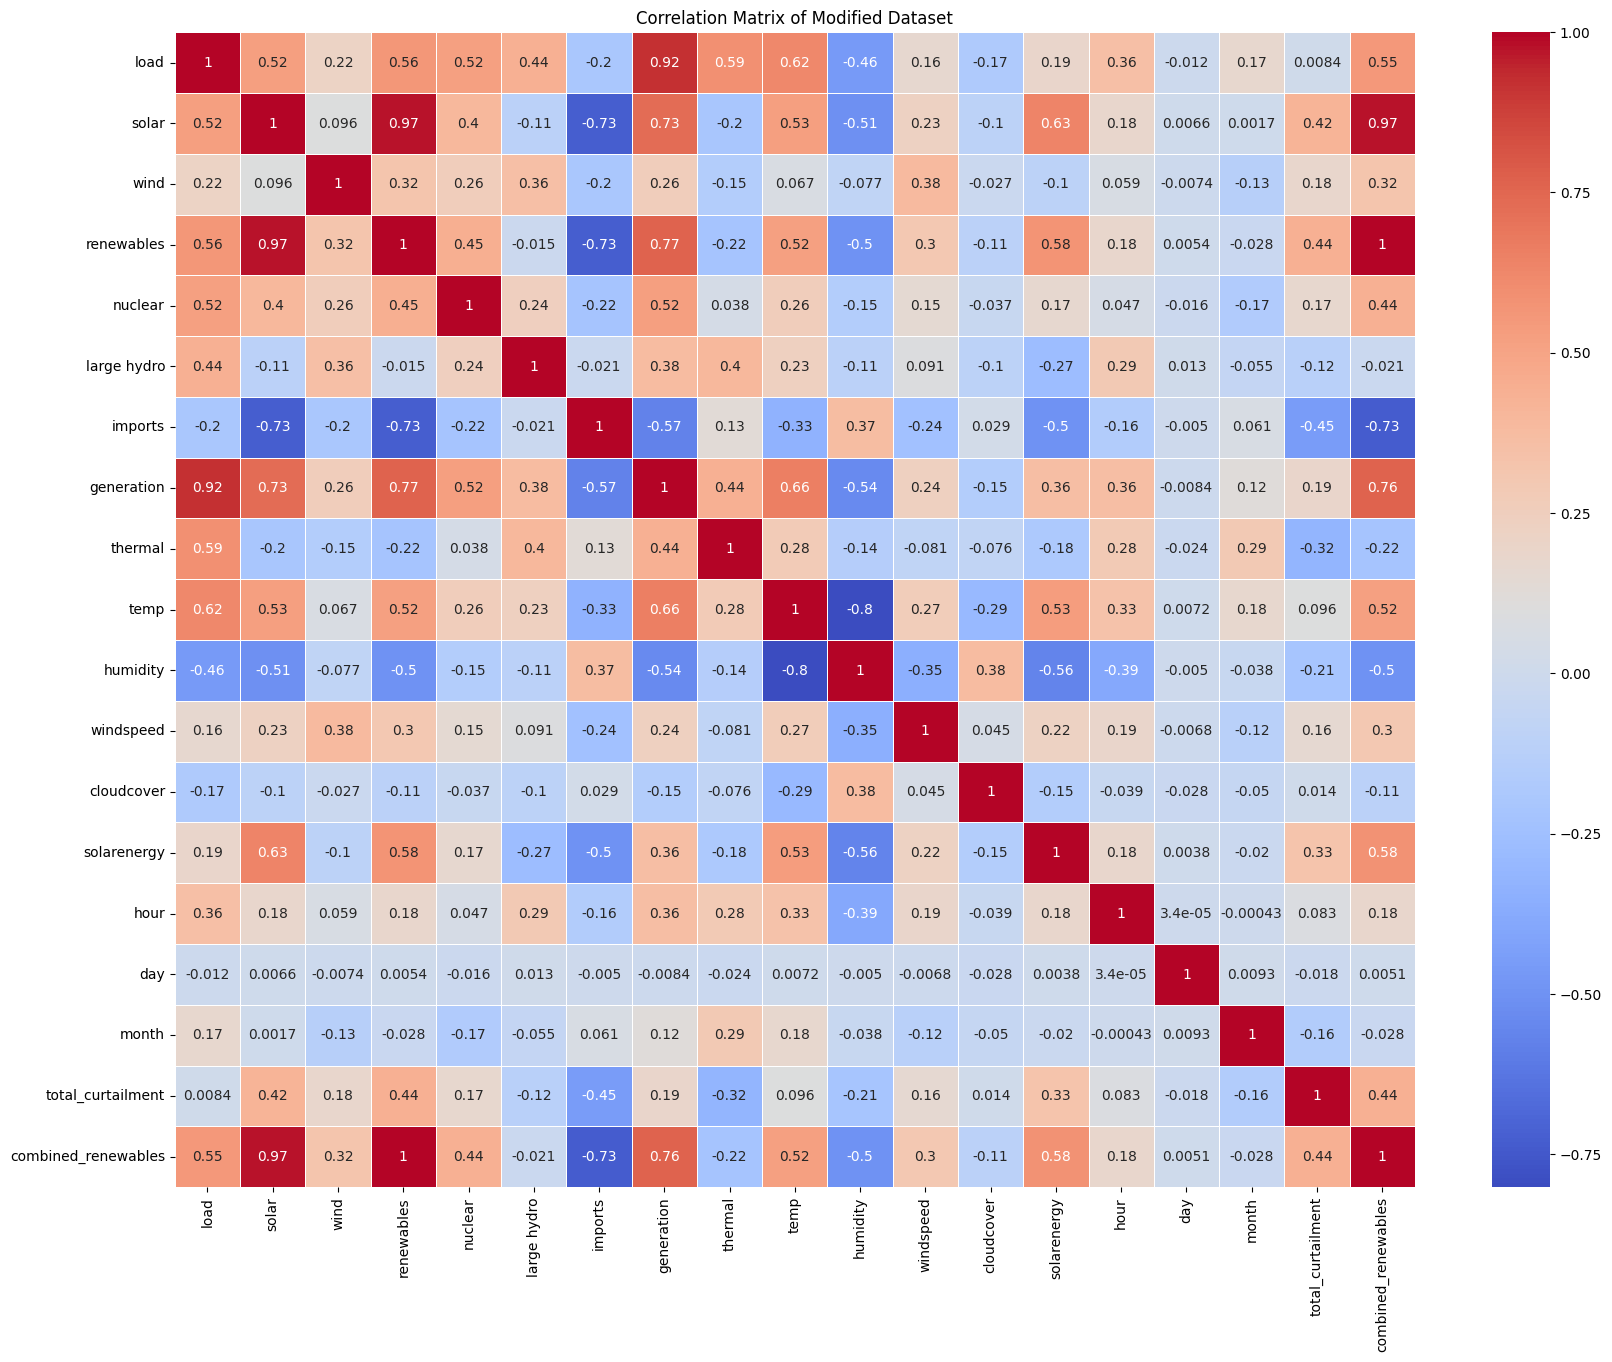

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns before calculating the correlation matrix
numeric_data_final = data_final.select_dtypes(include=['float64', 'int64'])

# Step 5: Correlation Analysis on the modified dataset
# Calculate the new correlation matrix for 'data_final'
new_correlation_matrix = numeric_data_final.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Modified Dataset')
plt.show()


In [ ]:
numeric_data_final.head()

,load,solar,wind,renewables,nuclear,large hydro,imports,generation,thermal,temp,humidity,windspeed,cloudcover,solarenergy,hour,day,month,total_curtailment,combined_renewables
0,261642.173073,0.0,3406.967436,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,6.3,92.32,0.5,8.7,0.0,1,1,1,0.0,23498.487728
1,252464.832604,0.0,5967.002946,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,6.2,92.32,0.5,8.7,0.0,2,1,1,0.0,28616.579101
2,245416.002344,0.0,6199.244249,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,5.8,95.57,5.8,8.7,0.0,3,1,1,0.0,29097.724204
3,241363.031667,0.0,5080.579630,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,6.1,92.25,4.9,5.0,0.0,4,1,1,0.0,26772.566699
4,239642.357318,0.0,9443.764928,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,5.2,92.37,0.5,5.0,0.0,5,1,1,0.0,35509.260757


####Descriptive statistics

In [ ]:
# Step 1: Descriptive Statistics
descriptive_stats = new_correlation_matrix.describe()

# Display the summary statistics
descriptive_stats


,load,solar,wind,renewables,nuclear,large hydro,imports,generation,thermal,temp,humidity,windspeed,cloudcover,solarenergy,hour,day,month,total_curtailment,combined_renewables
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.315316,0.264979,0.148534,0.289180,0.214646,0.137887,-0.184015,0.338813,0.095750,0.245912,-0.189642,0.154425,0.001768,0.156939,0.165322,0.048353,0.054716,0.118513,0.287536
std,0.379141,0.490542,0.277752,0.490121,0.297891,0.297766,0.422616,0.439490,0.343237,0.410234,0.422564,0.281988,0.275008,0.406773,0.276298,0.230737,0.258291,0.328672,0.490818
min,-0.461161,-0.725238,-0.198496,-0.727614,-0.220501,-0.268207,-0.731781,-0.570025,-0.321952,-0.801091,-0.801091,-0.354109,-0.288128,-0.562700,-0.391020,-0.027936,-0.165392,-0.452667,-0.731781
25%,0.086488,-0.050941,-0.051981,-0.021556,0.011042,-0.079658,-0.478797,0.155281,-0.169040,0.081931,-0.503145,0.019270,-0.106400,-0.125227,0.023369,-0.010439,-0.052458,-0.071382,-0.024349
50%,0.357484,0.226570,0.096388,0.321781,0.170848,0.012579,-0.198496,0.362931,-0.024058,0.267526,-0.214035,0.164548,-0.049569,0.178327,0.178327,-0.004952,-0.020272,0.096409,0.318167
75%,0.557483,0.581233,0.289527,0.568419,0.419564,0.322563,0.011801,0.694237,0.288599,0.522903,-0.057379,0.251996,-0.006348,0.445905,0.286972,0.006020,0.090315,0.260996,0.566685
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####Distribution analysis

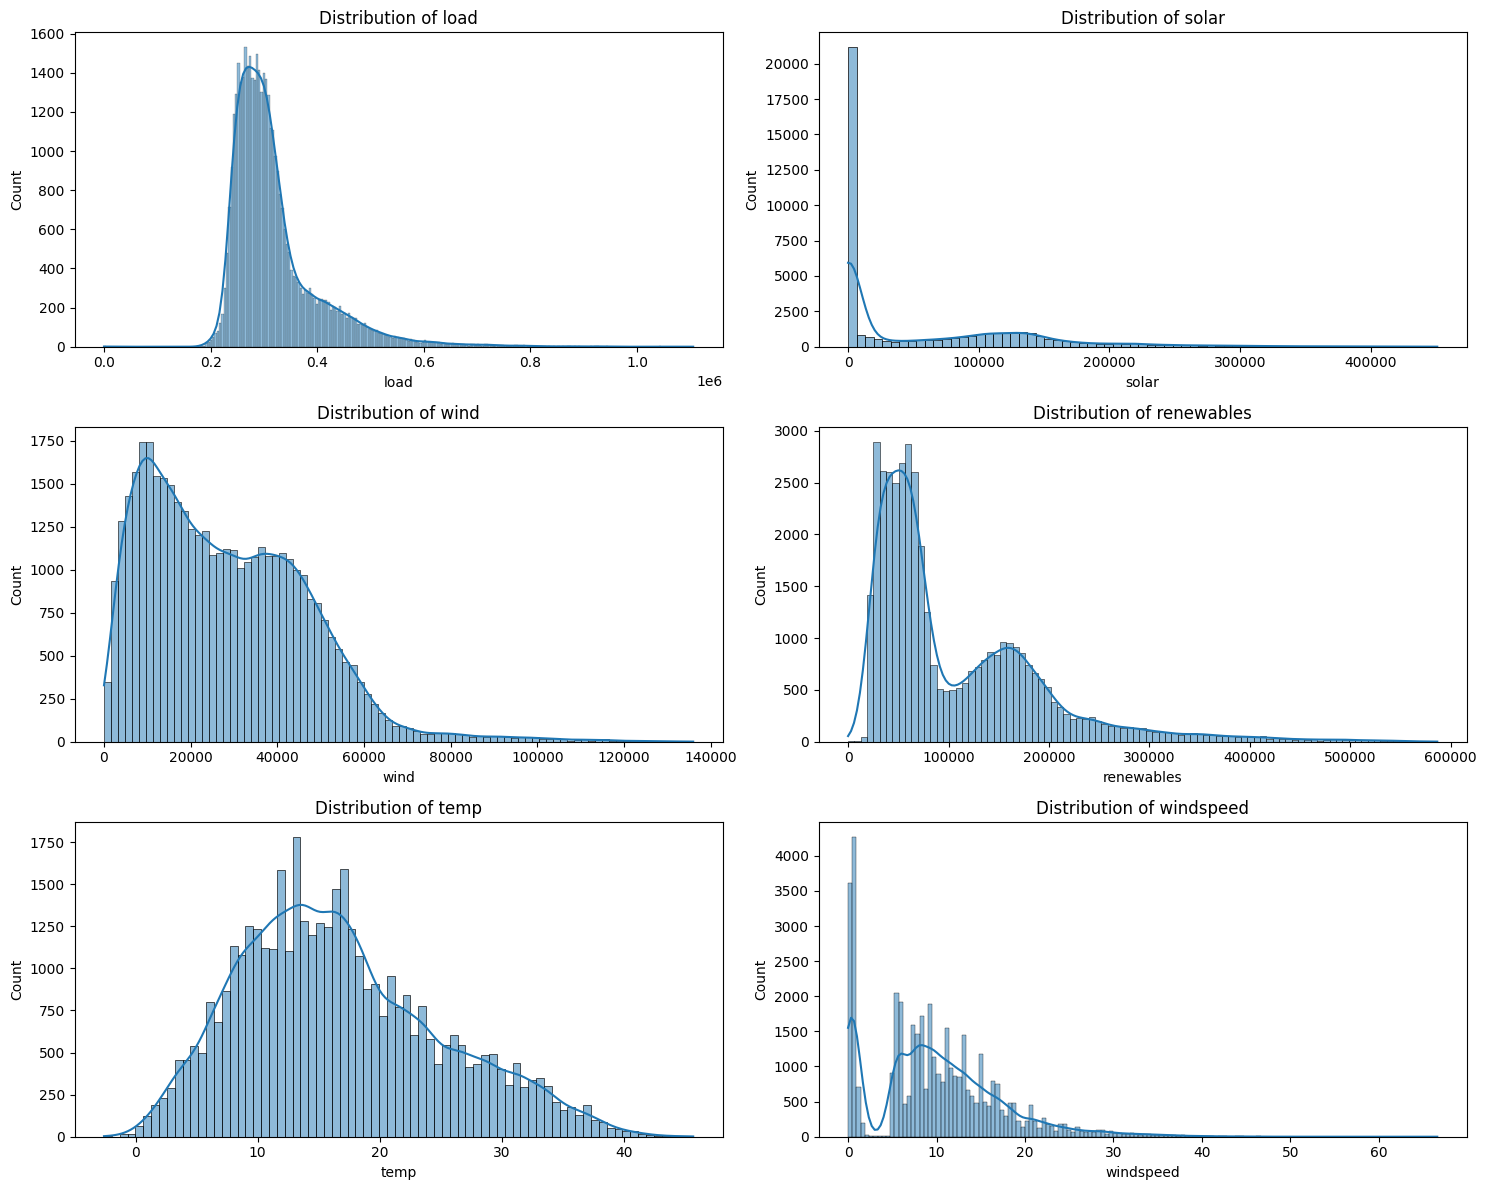

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define key features to visualize distributions
key_features = ['load', 'solar','wind','renewables', 'temp', 'windspeed']

# Set up the figure for subplots
plt.figure(figsize=(15, 12))

# Plot histograms for each of the key features
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data_final[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


**Interpretation of Distribution Analysis**

1. **Skewness in Energy Features:** The distributions of the majority of energy-related features, such as load, solar, wind, and renewables, are skewed to the right. This suggests that while high values are uncommon, low levels of energy production or consumption are far more prevalent. It draws attention to how intermittent and variable renewable energy production is, with periods of extremely low production occurring frequently.

2. **Intermittent Renewable Generation:** The intermittent nature of renewable energy sources is reflected in the large concentration of low values in the features pertaining to renewable energy generation (solar, wind, and mixed renewables). These regular low production levels could be caused by a variety of factors, including the seasons, weather, and time of day.

3. The sole feature that exhibits a normal-like distribution, which denotes seasonal stability and predicted volatility, is temperature. Because it has fewer extreme changes than energy generation, it may be a dependable input feature for modeling purposes.

4. The excessive skewness of some attributes may necessitate the use of data transformations (such as log or square root) in order to make them more appropriate for specific statistical studies or machine learning models that rely on normalcy.


5. Understanding Renewable Variability: The uneven distributions of renewable energy sources show how difficult it is to generate power from them consistently. It emphasizes how crucial it is to have reliable backup plans or storage options in order to maintain dependability when renewable energy production is low.


Overall, there is a skewed distribution of demand (load) and considerable unpredictability and intermittency in the data, especially in the production of renewable energy. This implies that addressing intermittency problems and investigating strategies to stabilize patterns of energy generation and consumption should be a primary focus of any modeling or analysis.






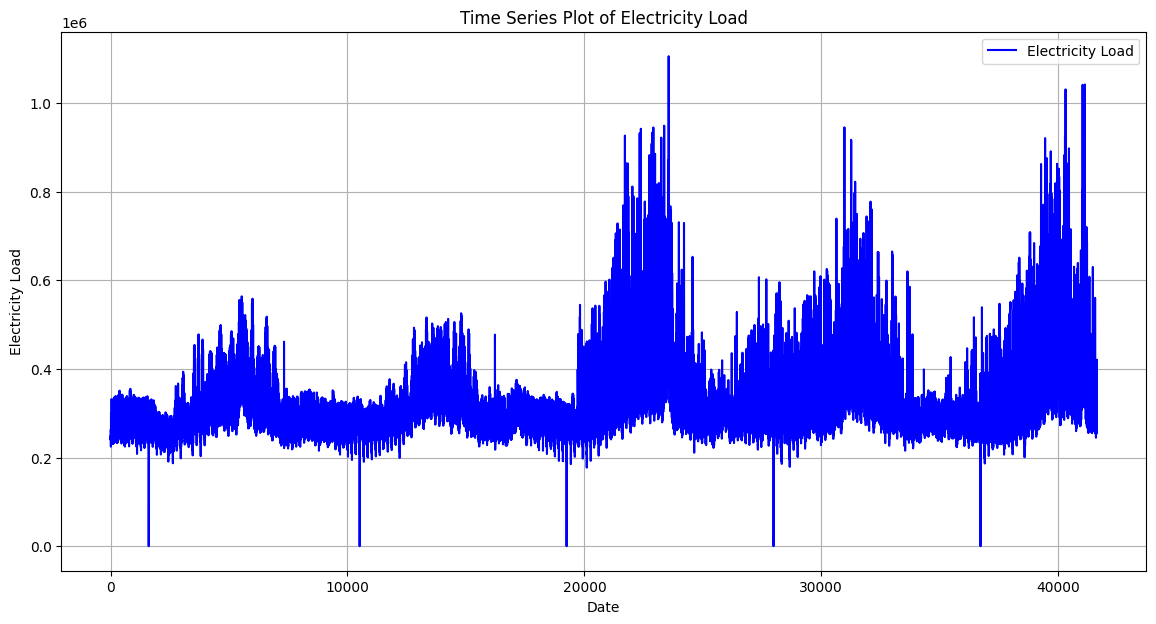

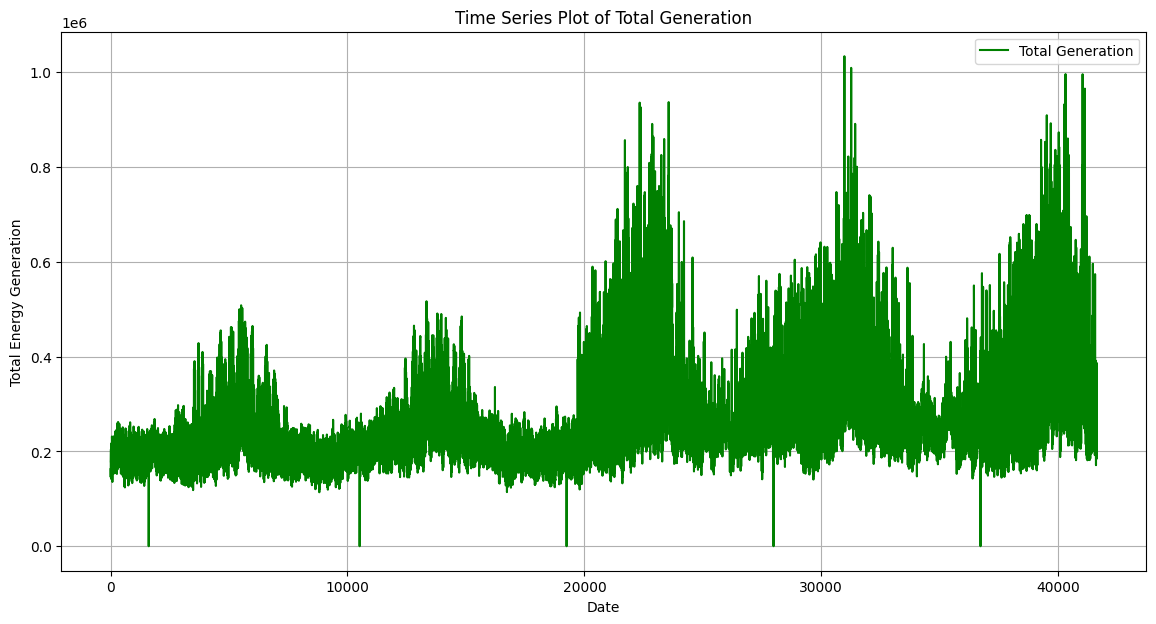

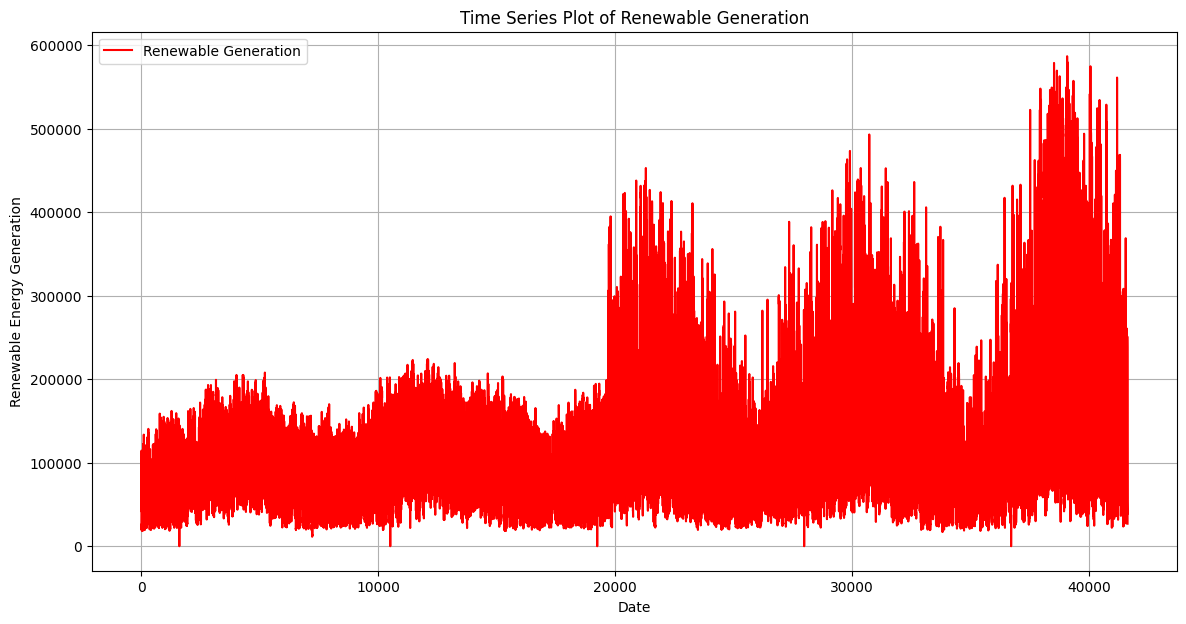

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the 'datetime' column as the index for easier plotting
data_final.set_index('datetime', inplace=True)

# Plotting the load over time
plt.figure(figsize=(14, 7))
plt.plot(numeric_data_final.index, numeric_data_final['load'], color='b', label='Electricity Load')
plt.xlabel('Date')
plt.ylabel('Electricity Load')
plt.title('Time Series Plot of Electricity Load')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the total generation over time
plt.figure(figsize=(14, 7))
plt.plot(numeric_data_final.index, numeric_data_final['generation'], color='g', label='Total Generation')
plt.xlabel('Date')
plt.ylabel('Total Energy Generation')
plt.title('Time Series Plot of Total Generation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the renewable generation (solar, wind, renewables) over time
plt.figure(figsize=(14, 7))
plt.plot(numeric_data_final.index, numeric_data_final['renewables'], color='r', label='Renewable Generation')
plt.xlabel('Date')
plt.ylabel('Renewable Energy Generation')
plt.title('Time Series Plot of Renewable Generation')
plt.legend()
plt.grid(True)
plt.show()


**Interpretation of Timeseries plot**

**1. For Electricity Load**
  - **Seasonal Peaks:** There are distinct seasonal peaks in the plot, with the electricity load increasing noticeably throughout particular seasons. Extreme weather circumstances, such as the need for heating in the winter or cooling in the summer, may be the cause of these peaks.
  - **General Trends:** The power load exhibits cyclic behavior over the entire period, as evidenced by an apparent fluctuating pattern. This can imply that some seasons or months continuously need higher electricity usage.
  - **Periods of Low Demand:** There are also noticeable decreases in the load at particular times, which may be related to public holidays or periods when business and industrial activity is slower.

**2. For Total Energy Generation**
  - **Correlation with Load:** The overall energy generation pattern seems to closely resemble the electricity load pattern, with generation peaks generally occurring in tandem with demand peaks. This suggests that energy production is expanding to efficiently satisfy demand.
  - **High Peaks:** High generation peaks, like the power load, are probably caused by higher output to keep up with seasonal demand peaks.
  - **Fluctuations:** In order to preserve stability, the system must quickly adapt to variations in demand, as shown by the generation fluctuations. This is typical of electrical grids.

**3. For Renewable Generation**
  - **Correlation with Load:** The overall energy generation pattern seems to closely resemble the electricity load pattern, with generation peaks generally occurring in tandem with demand peaks. This suggests that energy production is expanding to efficiently satisfy demand.
  - **High Peaks:** High generation peaks, like the power load, are probably caused by higher output to keep up with seasonal demand peaks.
  - **Fluctuations:** In order to preserve stability, the system must quickly adapt to variations in demand, as shown by the generation fluctuations. This is typical of electrical grids.




####Seasonal decomposition

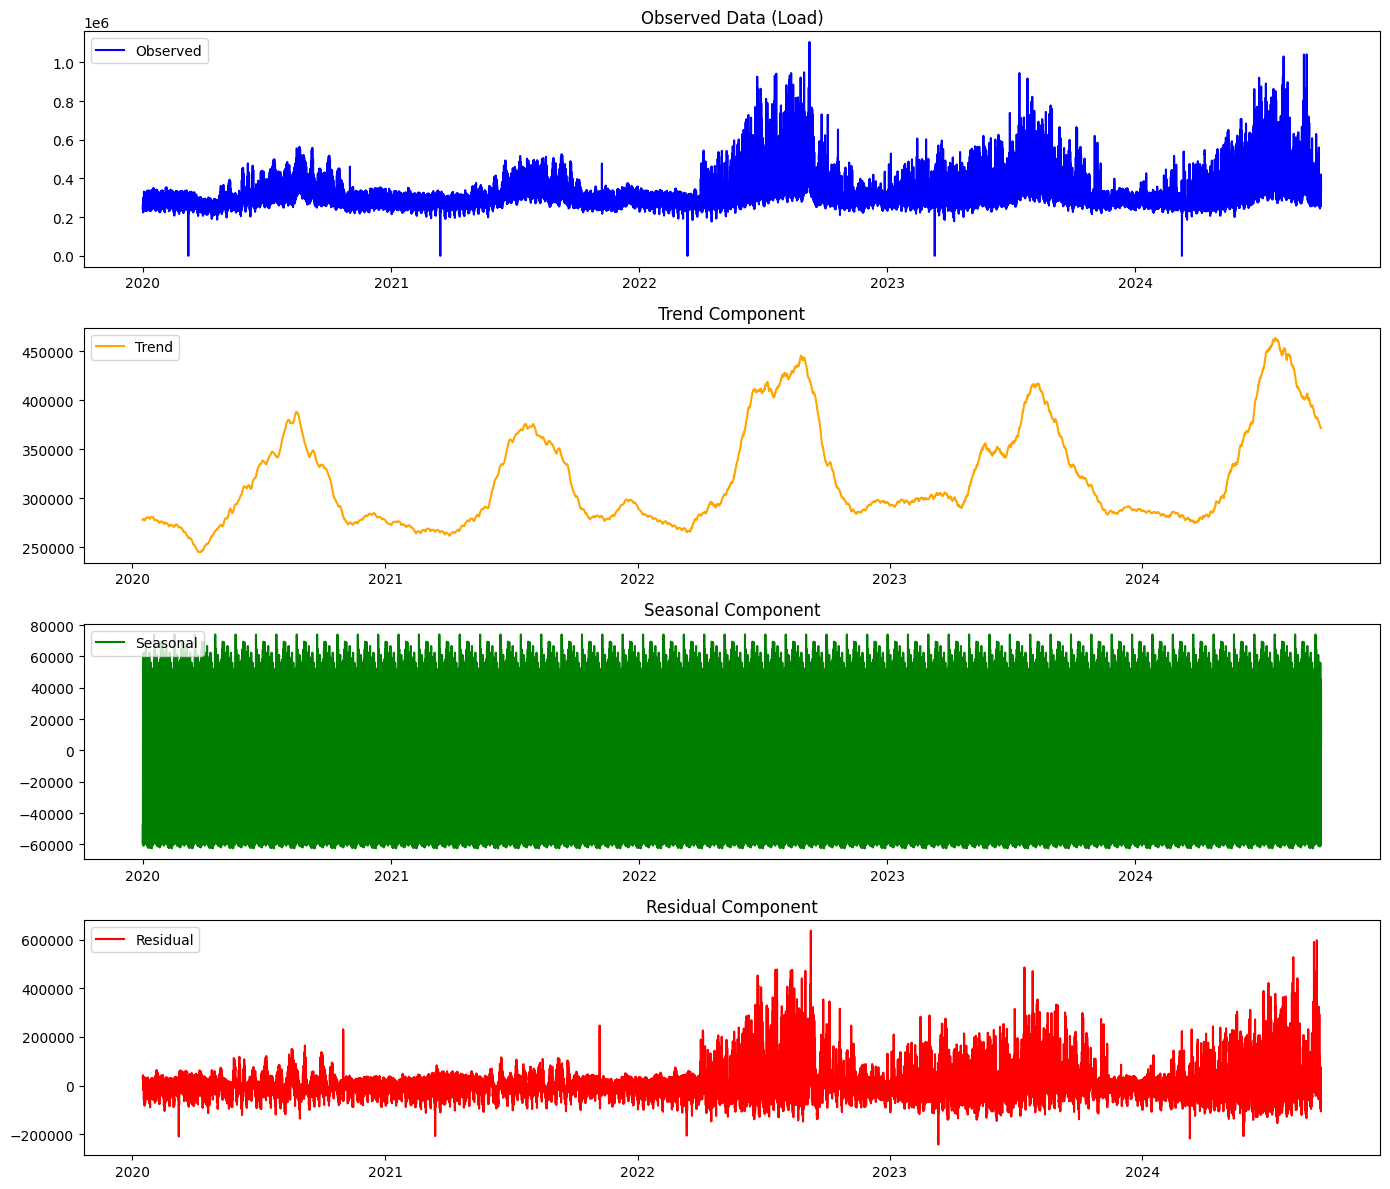

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition for the 'load' variable using an additive model
# Decompose the data into observed, trend, seasonal, and residual components
# Assuming daily periodicity over a month (24 hours * 30 days)
result = seasonal_decompose(data_final['load'], model='additive', period=24 * 30)

# Set the figure size for plotting the decomposition results
plt.figure(figsize=(14, 12))

# Plot the observed load data
plt.subplot(411)
plt.plot(result.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.title('Observed Data (Load)')

# Plot the trend component of the load data
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Plot the seasonal component of the load data
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Plot the residual component (noise) of the load data
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


**Interpretation of Seasonal Decomposition Plot**
- The observed load shows clear evidence of seasonal variations and long-term cyclic trends. There are recurring peaks and troughs, reflecting the impact of seasonal demand on electricity load.
- The trend component helps identify periods of increasing or decreasing demand over the years, likely affected by broader socio-economic factors.
- The seasonal component highlights regular fluctuations over time, which are expected and likely tied to daily, weekly, or monthly electricity usage patterns.
- The residual component indicates unexplained or irregular behavior in the load, suggesting that certain events (e.g., unexpected weather changes, holidays, or equipment failures) may have led to deviations from the expected patterns.

####Time series plots

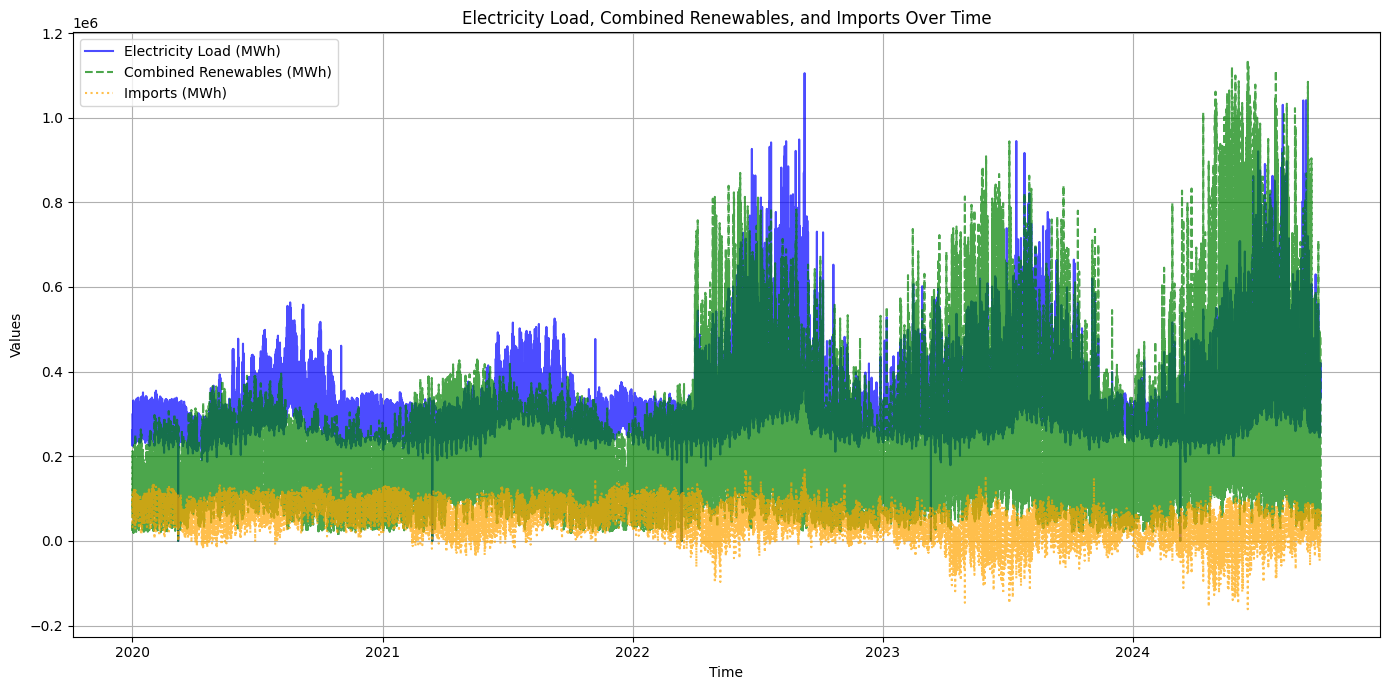

In [ ]:
# Plot Load, Combined Renewables, and Imports Over Time
plt.figure(figsize=(14, 7))

plt.plot(data_final.index, data_final['load'], label='Electricity Load (MWh)', color='blue', alpha=0.7)
plt.plot(data_final.index, data_final['combined_renewables'], label='Combined Renewables (MWh)', color='green', linestyle='--', alpha=0.7)
plt.plot(data_final.index, data_final['imports'], label='Imports (MWh)', color='orange', linestyle=':', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Electricity Load, Combined Renewables, and Imports Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpreation of Electricity Load, Combined Renewables, Imports over Time:**

- Demand vs. Supply: The electricity load (blue) consistently exceeds the generation from renewables (green), indicating that there is a gap between renewable generation and demand.
During peak periods, the gap widens, showing that renewable energy alone is insufficient to meet high demand. Therefore, additional energy sources (such as imports or other non-renewable generation) are necessary.
Role of Imports:

- Imports (orange) help balance the shortfall in supply, especially during demand peaks. This shows that imports are crucial in maintaining grid stability and meeting electricity demand during periods when local or renewable generation alone is not enough.
Imports seem to follow the trends in load, albeit with a smaller magnitude, suggesting a supplemental role during both regular and peak demand.
Increased Renewable Contribution:

- There is a noticeable increase in the generation from renewables from late 2022 onwards, suggesting a positive trend towards more reliance on renewables, which aligns with efforts to decarbonize energy generation.
However, the variability and limitations of renewables, especially in meeting peak load, highlight the need for energy storage solutions or backup generation to handle periods when renewable output is insufficient.
Seasonal and Cyclic Trends:

- The plot clearly shows seasonal trends in the load, where demand increases significantly during certain times of the year. The renewable generation, while increasing, cannot meet these peaks alone.
This observation indicates the importance of energy planning that considers seasonal variability and includes strategies for energy imports, storage, or demand response to manage peak load periods effectively.

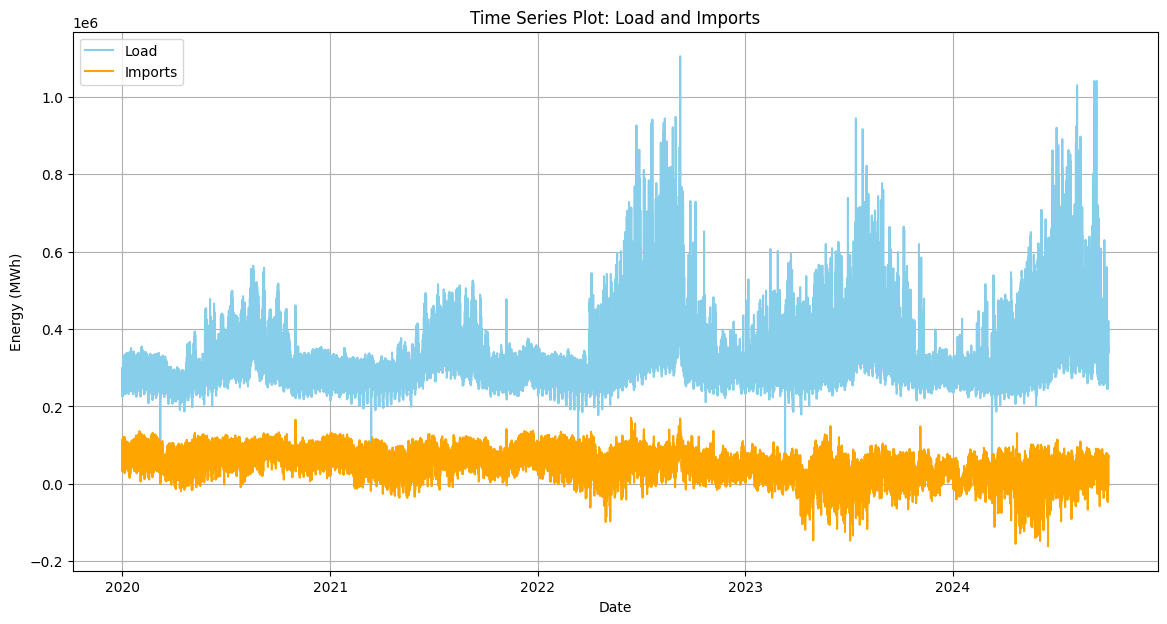

In [ ]:
import matplotlib.pyplot as plt

# Plotting time series line chart for 'load' and 'imports'
plt.figure(figsize=(14, 7))
plt.plot(data_final.index, data_final['load'], label='Load', color='skyblue')
plt.plot(data_final.index, data_final['imports'], label='Imports', color='orange')
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.title('Time Series Plot: Load and Imports')
plt.legend()
plt.grid(True)
plt.show()


**Interpretation of Load and Imports**

- The electricity load exhibits strong seasonal variability, with recurring high peaks and low valleys over each year, reflecting typical seasonal energy consumption patterns.
- Imports appear to play a steady supplementary role, providing a consistent level of energy but not adjusting significantly to the peaks in demand. This indicates that local generation, including both renewable and non-renewable sources, is relied upon heavily to handle high consumption periods.
- The consistency in imports suggests that, while they are an important source of energy stability, the main challenge is to manage and balance the load using local and renewable energy sources effectively, especially during high demand periods.

####Stacked Area Chart for Contribution:



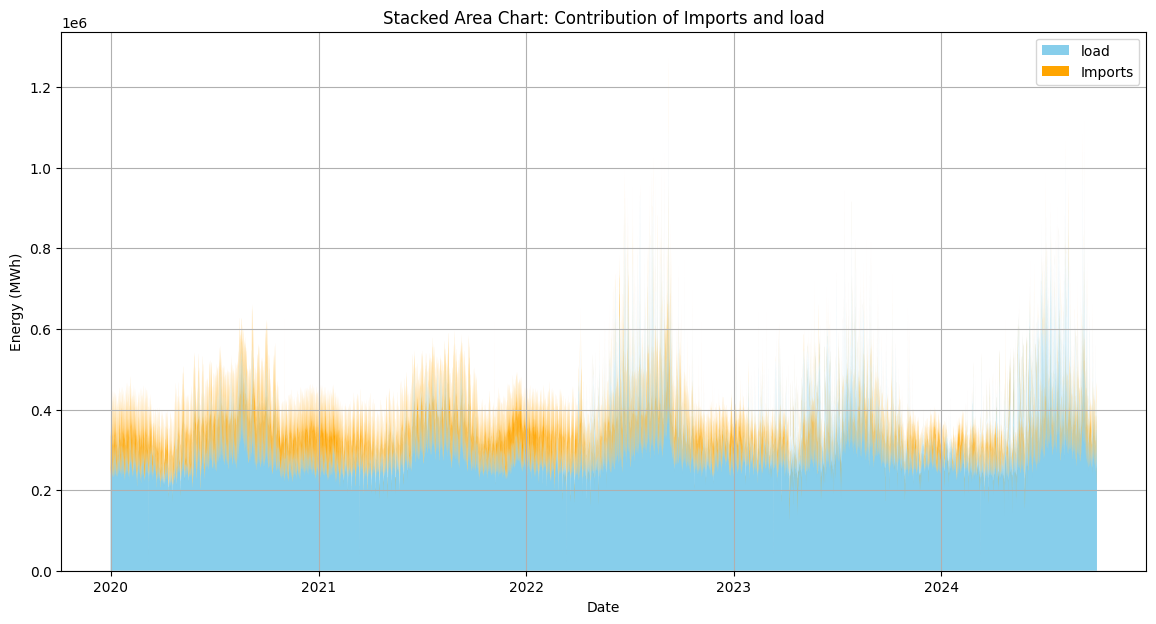

In [ ]:
plt.figure(figsize=(14, 7))
plt.stackplot(data_final.index, data_final['load'], data_final['imports'],
              labels=['load', 'Imports'], colors=['skyblue', 'orange'])
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.title('Stacked Area Chart: Contribution of Imports and load')
plt.legend()
plt.grid(True)
plt.show()


**Interpretation of Contirbution of Imports and Load**

1. **Dependence on Local Generation:**

  The light blue area, which represents load, is substantially larger than the imports contribution, indicating that the electricity system is highly dependent on local generation to meet energy needs.
  Imports provide only a small share of the total energy mix, which means that local renewable and non-renewable sources play a primary role in energy supply.

2. **Steady Imports Contribution:**
  Imports maintain a consistent level of support throughout the observed period. Their relatively steady contribution suggests that imports are used to meet baseline energy requirements and ensure reliability.
  Even during times of increased load, the imports do not increase proportionally, which could indicate that import contracts or capacity limitations do not allow for a significant ramp-up in imports during peak periods.

3. **Seasonal Variability:**

  The total load (light blue area) shows significant seasonal variability, with regular peaks and troughs each year. This highlights the importance of flexible local generation capacity to handle changing demand patterns.
  The peaks in load suggest that energy planners need to focus on strategies to either meet peak demands more efficiently or manage demand through mechanisms like demand response or energy storage.

####Scatter plot

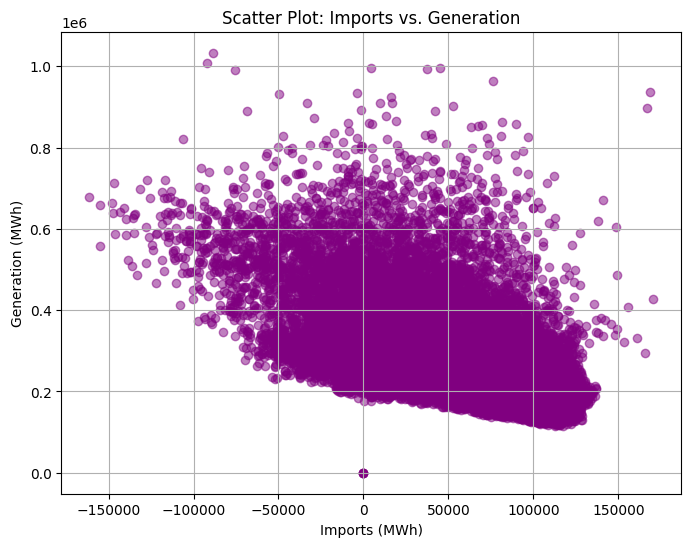

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_final['imports'], data_final['generation'], color='purple', alpha=0.5)
plt.xlabel('Imports (MWh)')
plt.ylabel('Generation (MWh)')
plt.title('Scatter Plot: Imports vs. Generation')
plt.grid(True)
plt.show()


**Interpretation of Scatter plots**

- The scatter plot suggests a complex relationship between imports and generation, with no clear one-to-one correlation between the two.

- Negative import values (indicating exports) occur when generation is sufficiently high, implying that the system can produce excess energy beyond local requirements, possibly due to favorable conditions for renewable energy generation.

- The triangular distribution implies that when generation levels are low, imports play a more critical role in meeting demand, whereas when generation is high, the reliance on imports is reduced, and excess energy can even be exported.

- High variability in import values for similar generation levels indicates that imports are likely driven by other factors, such as demand peaks, market conditions, or specific energy policies, rather than directly tracking with local generation.

In [ ]:
data_final.to_csv('final_data.csv')